# Travail suplementaire réaliser lors de mon stage d'excellence avec Python


##  Partie 1: Statistique inferentielle 

### 1. Chargement des bibliothèques nécéssaires et disponibles sur python et données

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import shapiro, ttest_1samp
import scipy.stats as stats


In [3]:
# Variable dépendante Y (Consommation totale)
Y = [40562.67, 42917.77, 41145.09, 39601.06, 38995.11,
     37851.90, 40038.57, 33923.60, 32060.60, 34059.37]

# Variables indépendantes (prix des énergies)
X = [
    [0.170, 0.072, 0.073, 0.127, 0.061],
    [0.170, 0.066, 0.065, 0.118, 0.060],
    [0.173, 0.067, 0.076, 0.132, 0.060],
    [0.177, 0.071, 0.093, 0.143, 0.061],
    [0.185, 0.079, 0.095, 0.142, 0.064],
    [0.194, 0.073, 0.078, 0.145, 0.065],
    [0.198, 0.074, 0.091, 0.149, 0.067],
    [0.215, 0.093, 0.149, 0.160, 0.107],
    [0.245, 0.111, 0.129, 0.166, 0.106],
    [0.252, 0.126, 0.123, 0.172, 0.079],
]

# Création d'un DataFrame
df = pd.DataFrame(X, columns=['Electricite', 'Gaz_naturel', 'Fioul_domestique', 'Petrole', 'Bois'])
df['Consommation'] = Y
df.head()


,Electricite,Gaz_naturel,Fioul_domestique,Petrole,Bois,Consommation
0,0.170,0.072,0.073,0.127,0.061,40562.67
1,0.170,0.066,0.065,0.118,0.060,42917.77
2,0.173,0.067,0.076,0.132,0.060,41145.09
3,0.177,0.071,0.093,0.143,0.061,39601.06
4,0.185,0.079,0.095,0.142,0.064,38995.11


### 2. Régression linéaire simple pour 5 energies

In [4]:
# Régression simple : Consommation ~ Energies
variables = ['Electricite', 'Gaz_naturel', 'Fioul_domestique', 'Petrole']

for var in variables:
    print(f"--- Régression simple : Consommation ~ {var} ---")
    model = smf.ols(f'Consommation ~ {var}', data=df).fit()
    print(model.summary())
    print("\n")


--- Régression simple : Consommation ~ Electricite ---
                            OLS Regression Results                            
Dep. Variable:           Consommation   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     42.48
Date:                Sat, 26 Jul 2025   Prob (F-statistic):           0.000185
Time:                        20:43:51   Log-Likelihood:                -86.297
No. Observations:                  10   AIC:                             176.6
Df Residuals:                       8   BIC:                             177.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

C:\Users\DVE ICAMPUS\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)
C:\Users\DVE ICAMPUS\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)
C:\Users\DVE ICAMPUS\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)
C:\Users\DVE ICAMPUS\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


## Representation graphique 

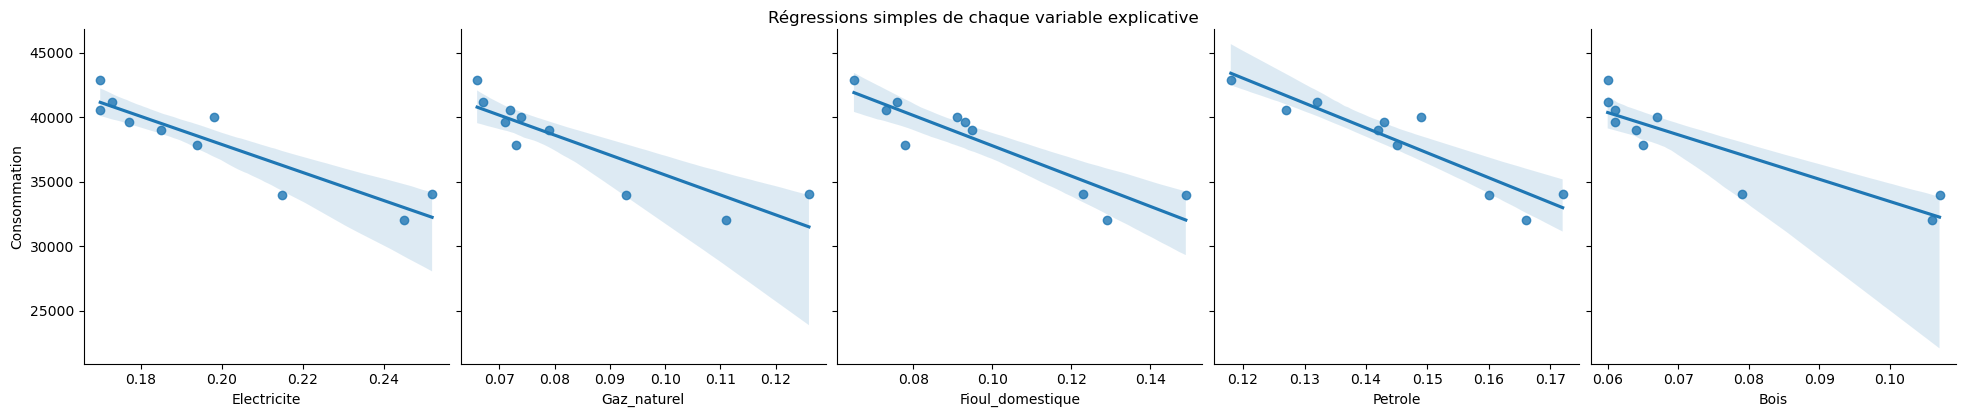

In [16]:
# Données
X = pd.DataFrame({
    'Electricite': [0.170, 0.170, 0.173, 0.177, 0.185, 0.194, 0.198, 0.215, 0.245, 0.252],
    'Gaz_naturel': [0.072, 0.066, 0.067, 0.071, 0.079, 0.073, 0.074, 0.093, 0.111, 0.126],
    'Fioul_domestique': [0.073, 0.065, 0.076, 0.093, 0.095, 0.078, 0.091, 0.149, 0.129, 0.123],
    'Petrole': [0.127, 0.118, 0.132, 0.143, 0.142, 0.145, 0.149, 0.160, 0.166, 0.172],
    'Bois': [0.061, 0.060, 0.060, 0.061, 0.064, 0.065, 0.067, 0.107, 0.106, 0.079],
    'Consommation': [40562.67, 42917.77, 41145.09, 39601.06, 38995.11,
                     37851.90, 40038.57, 33923.60, 32060.60, 34059.37]
})

# Tracer les régressions individuelles
sns.pairplot(X,
             x_vars=['Electricite', 'Gaz_naturel', 'Fioul_domestique', 'Petrole', 'Bois'],
             y_vars='Consommation',
             kind='reg',
             height=4,
             aspect=1)

plt.suptitle("Régressions simples de chaque variable explicative", y=1.02)
plt.show()

### 3. Régression linéaire multiple

In [5]:
# Régression multiple avec toutes les variables
model_multiple = smf.ols('Consommation ~ Electricite + Gaz_naturel + Fioul_domestique + Petrole + Bois', data=df).fit()

print(model_multiple.summary())


                            OLS Regression Results                            
Dep. Variable:           Consommation   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     52.57
Date:                Sat, 26 Jul 2025   Prob (F-statistic):           0.000968
Time:                        20:43:51   Log-Likelihood:                -74.505
No. Observations:                  10   AIC:                             161.0
Df Residuals:                       4   BIC:                             162.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         6.541e+04   3446.078  

C:\Users\DVE ICAMPUS\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


### 4. ANOVA sur le modèle de régression multiple

In [6]:
from statsmodels.stats.anova import anova_lm

anova_results = anova_lm(model_multiple)
print(anova_results)


                   df        sum_sq       mean_sq           F    PR(>F)
Electricite       1.0  9.733364e+07  9.733364e+07  224.565531  0.000116
Gaz_naturel       1.0  5.969688e+03  5.969688e+03    0.013773  0.912233
Fioul_domestique  1.0  9.150997e+06  9.150997e+06   21.112933  0.010070
Petrole           1.0  9.038739e+04  9.038739e+04    0.208539  0.671613
Bois              1.0  7.348453e+06  7.348453e+06   16.954151  0.014642
Residual          4.0  1.733724e+06  4.334309e+05         NaN       NaN


## 5. Tests statistiques sur la régression multiple
### Contexte

**Model**: 
- ***Variable dépendante (Y)*** : consommation totale d’énergie
- ***Variables explicatives (X)*** : ( **Electricité**, **Gaz**, **Fioul**, **Petrole**, **Bois**)
 
L'équation de notre modèle de regression s'écrit comme suit:

   **Consommation** = $\beta_0$ + $\beta_1$ * **Electricite**  + $\beta_2$ * **Gaz** + $\beta_3$ * **Fioul** + $\beta_4$ * **Petrole** + $\beta_5$ * **Bois** + $\xi$; 

   Chaque coefficient $\beta_i$ représente l’effet marginal du prix de la source d’énergie ***i*** sur la consommation totale.


### a) Hypothèse du Test t de student (test individuel)
####   1) Hypothèse nulle (H₀) : $\ll$ Le prix de l’énergie ***i*** n’a aucun effet significatif sur la consommation.$\gg$
-  **H₀** : $\beta_i$ = 0 
####   2) Hypothèse alternative (H₁) : $\ll$ Le prix de l’énergie ***i*** a un effet significatif sur la consommation.$\gg$
-  **H₁** : $\beta_i \neq $ 0
 ####  3) Interpretation: Pour chaque Energies 
- Si p-value > 0.05 pour $\beta_i$ alors ***la variable est significative : son prix influence la consommation.***
- si p-value $\geqslant$ 0.05 pour $\beta_i$ alors ***La variable n'est pas significative : on n’a pas de preuve qu’elle influence la consommation.***

### Application du Test t de Student (déjà inclus dans `.summary()` via la colonne `t` dans le cas de la régression linéaire)
       Mais on peut aussi tester une hypothèse manuellement :

In [7]:
# Exemple : test si le coefficient de Petrole = 0 (H0)
t_stat = model_multiple.tvalues['Petrole']
p_value_t = model_multiple.pvalues['Petrole']
print(f"T-statistique (Petrole): {t_stat:.4f} | p-value: {p_value_t:.4f}")


T-statistique (Petrole): -3.6785 | p-value: 0.0212


### b) Hypothèses du Test F
####    1) Hypothèse nulle (H₀) : $\ll$ Aucune des sources d’énergie n’explique significativement la variation de la consommation totale $\gg$
Autrement dit :  **H₀** : $\beta_{Electricite}$ = $\beta_{Gaz}$ = $\beta_{Fioul}$  = $\beta_{Petrole}$ = $\beta_{Bois}$ = 0 ;                                        **Cela veut dire que le modèle de régression multiple n’a pas d’utilité explicative.**
####    2) Hypothèse alternative (H₁) :$\ll$  Au moins une des sources d’énergie a un effet significatif sur la consommation totale $\gg$ 
Autrement dit:   **H₁**: $\exists$ i tel que $\beta_i \neq$ 0
####    3) Interpretation: 
***Si la p-value associée est inférieure à 5%, on rejettera H₀ et on conclura que le modèle est globalement significatif.***

### Application du Test F de Fisher (test global de la régression)

In [8]:
print(f"F-statistique : {model_multiple.fvalue:.4f}")
print(f"p-value : {model_multiple.f_pvalue:.4f}")

if model_multiple.f_pvalue < 0.05:
    print("Modèle globalement significatif (on rejette H0)")
else:
    print("Modèle non significatif")


F-statistique : 52.5710
p-value : 0.0010
Modèle globalement significatif (on rejette H0)


## 6. Analyse des résidus et normalité

### a) Résidus


In [11]:
residus = model_multiple.resid


### b) Histogramme + densité

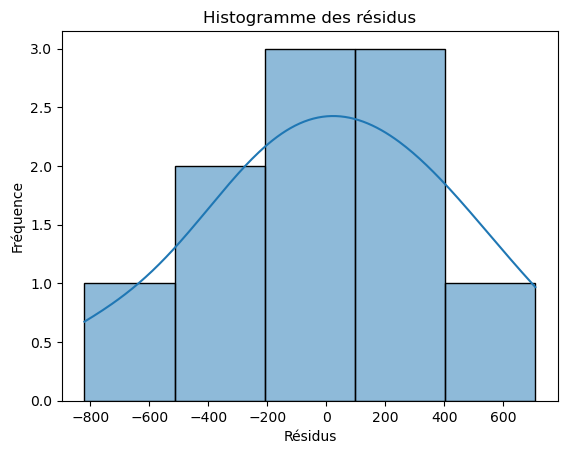

In [12]:
sns.histplot(residus, kde=True)
plt.title("Histogramme des résidus")
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.show()


## 7. Tracer Résidus vs Valeurs ajustées

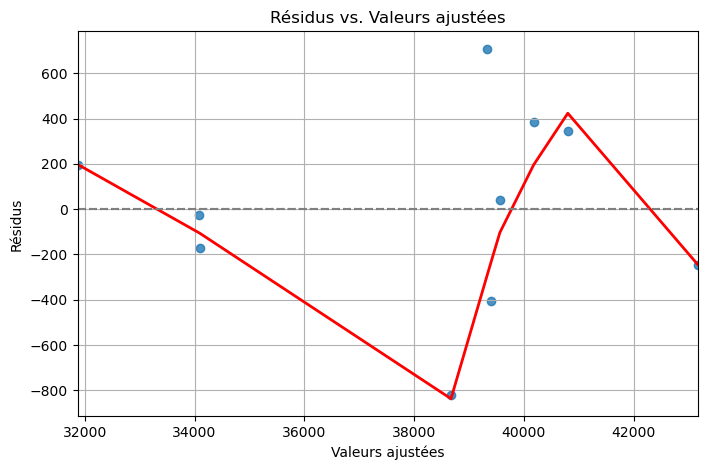

In [15]:
# Valeurs ajustées (prédictions) et résidus
fitted_values = model_multiple.fittedvalues
residuals = model_multiple.resid

# Tracé
plt.figure(figsize=(8, 5))
sns.residplot(x=fitted_values, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Valeurs ajustées')
plt.ylabel('Résidus')
plt.title('Résidus vs. Valeurs ajustées')
plt.grid(True)
plt.show()

## 8. Test de normalité Shapiro-Wilk

In [13]:
stat_shapiro, p_shapiro = shapiro(residus)
print(f"Shapiro-Wilk Stat = {stat_shapiro:.4f} | p-value = {p_shapiro:.4f}")

if p_shapiro > 0.05:
    print("Résidus normalement distribués (on ne rejette pas H0)")
else:
    print("Résidus non normaux (on rejette H0)")


Shapiro-Wilk Stat = 0.9903 | p-value = 0.9972
Résidus normalement distribués (on ne rejette pas H0)


## 9. QQ-Plot (Quantile-Quantile plot)

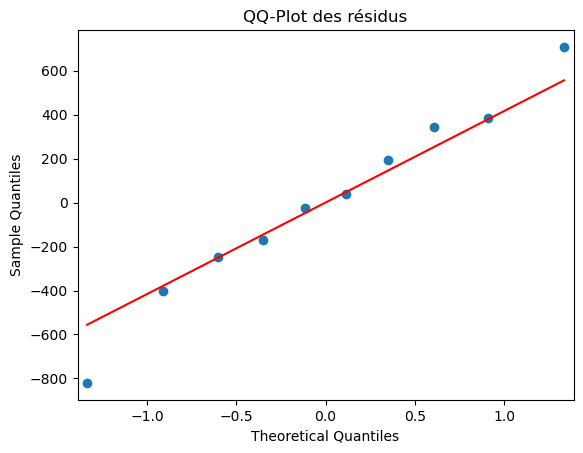

In [14]:
sm.qqplot(residus, line='s')
plt.title("QQ-Plot des résidus")
plt.show()


# Partie 2: Analyse de sensibilité

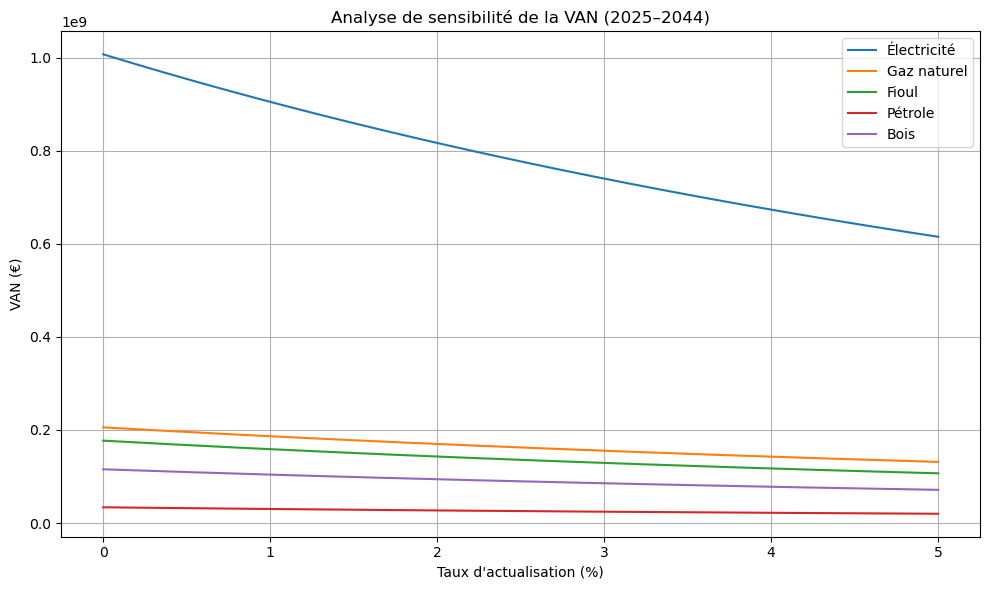

In [17]:
# 1. Taux d'actualisation
taux = np.linspace(0, 0.05, 501)
nPeriode = 20

# 2. Flux par énergie
elect = [44387809.64, 45016512.84, 45645216.03, 46273919.22, 46902622.41,
         47531325.61, 48160028.8, 48788731.99, 49417435.19, 50046138.38,
         50674841.57, 51303544.77, 51932247.96, 52560951.15, 53189654.34,
         53818357.54, 54447060.73, 55075763.92, 55704467.12, 56333170.31]

gaz = [11894563.27, 11612122, 11567409.08, 11284967.82, 11240254.9,
       10957813.63, 10913100.72, 10630659.45, 10585946.53, 10303505.26,
       10258792.35, 9976351.08, 9931638.16, 9649196.9, 9604483.98,
       9322042.71, 9277329.8, 8994888.53, 8950175.61, 8667734.34]

fioul = [7193231.97, 7368018.36, 7542729.7, 7717501.43, 7892287.82,
         8066999.16, 8241770.88, 8416557.27, 8591268.61, 8766040.34,
         8940826.73, 9115538.06, 9290309.79, 9465096.18, 9639807.52,
         9814579.25, 9989365.63, 10164076.97, 10338848.7, 10513635.09]

petrole = [1267083.76, 1142690.58, 1186979.08, 1439644.66, 1315251.48,
           1359539.97, 1612205.55, 1487812.37, 1532100.87, 1784766.44,
           1660373.26, 1704661.76, 1957327.33, 1832934.15, 1877222.65,
           2129888.23, 2005495.05, 2049783.54, 2302449.12, 2178055.94]

bois = [5467620.69, 5500036.99, 5532453.28, 5564869.58, 5597285.87,
        5629702.16, 5662118.46, 5694534.75, 5726951.05, 5759367.34,
        5791783.64, 5824199.93, 5856616.23, 5889032.52, 5921448.81,
        5953865.11, 5986281.4, 6018697.7, 6051113.99, 6083530.29]

# 3. Calcul VAN
def compute_van(flux, taux):
    d = (1 + taux[:, np.newaxis]) ** np.arange(1, nPeriode + 1)
    return np.sum(flux / d, axis=1)

# Transformer en tableau pour calcul matriciel
fluxes = {
    "Électricité": np.array(elect),
    "Gaz naturel": np.array(gaz),
    "Fioul": np.array(fioul),
    "Pétrole": np.array(petrole),
    "Bois": np.array(bois)
}

# 4. Tracé
plt.figure(figsize=(10, 6))
for label, flux in fluxes.items():
    van = compute_van(flux, taux)
    plt.plot(taux * 100, van, label=label)

plt.xlabel("Taux d'actualisation (%)")
plt.ylabel("VAN (€)")
plt.title("Analyse de sensibilité de la VAN (2025–2044)")
plt.grid(True)
plt.legend()
plt.tight_layout()
